# R的敘述性統計

## 許sir

本小節的目的為統整統計學在敘述性統計在R語言上的寫法

資料來源 https://rpubs.com/skydome20/R-Note10-Missing_Value


### [基本資料設定]
- 我們採用內建的iris資料

 1. 花萼長度(Sepal Length)
 2. 花萼寬度(Sepal Width)
 3. 花瓣長度(Petal Length)
 4. 花瓣寬度(Petal Width)
 5. 類別(Species)：可分為Setosa，Versicolor和Virginica三個品種。

In [2]:
data(iris)
dim(iris) # 查看列數與欄數

[1] 150   5

### [PART 1]. 資料概述

- 在收到一筆資料時, 我們常常先不去碰所謂的"統計學"
- 而是先摸摸看資料, 看看它長的怎樣？是圓的還是方的？資料屬性是什麼？
- 這樣做的目的, 是預先可以想像一下, 後續可能可以做些什麼？該用哪些統計方法來看資料？

In [10]:
#看看IRIS資料集的頭尾
head(iris, 10) #取前10筆資料
tail(iris,10) #取後10筆資料

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa
4.9,3.1,1.5,0.1,setosa


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
141,6.7,3.1,5.6,2.4,virginica
142,6.9,3.1,5.1,2.3,virginica
143,5.8,2.7,5.1,1.9,virginica
144,6.8,3.2,5.9,2.3,virginica
145,6.7,3.3,5.7,2.5,virginica
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica
149,6.2,3.4,5.4,2.3,virginica
150,5.9,3.0,5.1,1.8,virginica


### [PART 2]. 基本趨勢量數

### 2-1.集中趨勢量數

In [18]:
mean(iris$Sepal.Length)     #「花萼長度」的平均值
median(iris$Sepal.Length)   #「花萼長度」的中位數
max(iris$Sepal.Length)      #「花萼長度」中的最大值
min(iris$Sepal.Length)      #「花萼長度」中的最小值
sum(iris$Sepal.Length)      #「花萼長度」加總


[1] 5.843333

[1] 5.8

[1] 7.9

[1] 4.3

[1] 876.5

In [21]:
#類別資料算平均，得到NA不是夢
mean(iris$Species)

Warning message in mean.default(iris$Species):
“argument is not numeric or logical: returning NA”

[1] NA

### 2-2. 分散趨勢量數

In [19]:
var(iris$Sepal.Length)      #「花萼長度」的變異數
sd(iris$Sepal.Length)       #「花萼長度」的標準差
range(iris$Sepal.Length)    #「花萼長度」最小值和最大值(全距)

[1] 0.6856935

[1] 0.8280661

[1] 4.3 7.9

In [20]:
quantile(iris$Sepal.Length, probs=0.25)  # 第一四分位數 
quantile(iris$Sepal.Length, probs=0.75)  # 第三四分位數 

25% 
5.1

75% 
6.4

### 2-3. 一個一個key好累, 有沒有一個指令就可以搞定的

In [22]:
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

In [25]:
#可是summary 指令有些東西沒有呈現, 還是要自己算
sd(iris$Sepal.Length)  #標準差

[1] 0.8280661

In [26]:
n=table(iris$Sepal.Length)
as.numeric(names(n))[which.max(n)] #眾數

[1] 5

### [PART 3].遺漏值處理

- 不管你是發問卷還是使用公司的資料集
- 你都有可能碰到"很雷" 的dada-set
- 這時你必需處理missing data

- 在處理遺漏值時，大多數的人都會「直接移除資料」或是用「平均值來填補遺漏值」，但這樣的做法並不推薦：前者會讓資料減少，後者不會產生任何資訊。

- 因此在遺漏值處理的手法上，最推崇的就是「k-Nearest Neighbours」或「mice套件」來填補遺漏值。其中，mice的全名為Multivariate Imputation via Chained Equations。

In [29]:
#我們先使用iris的資料集，讓資料中隨機產生遺漏值
install.packages("missForest")
require(missForest) # prodNA() function

also installing the dependency ‘itertools’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: missForest
Loading required package: randomForest
randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.
Loading required package: foreach
Loading required package: itertools
Loading required package: iterators


In [32]:
data <- prodNA(iris, noNA = 0.1) ## 在iris資料內，隨機產生10%的遺漏值
head(data)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,NA,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,NA


### 3-1. 直接移除有遺漏值的資料

In [33]:
# 當一筆資料是完整的，回傳TRUE；當一筆資料有遺漏值，回傳FALSE
complete.cases(data)

[1]  TRUE  TRUE  TRUE FALSE  TRUE FALSE  TRUE  TRUE  TRUE FALSE FALSE FALSE
 [13]  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE FALSE  TRUE
 [25]  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE FALSE  TRUE
 [37]  TRUE  TRUE  TRUE  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE
 [49]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE
 [61] FALSE  TRUE FALSE FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE  TRUE
 [73]  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE
 [85] FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE
 [97]  TRUE  TRUE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE
[109]  TRUE FALSE  TRUE  TRUE FALSE  TRUE FALSE  TRUE  TRUE FALSE FALSE FALSE
[121]  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE
[133]  TRUE FALSE  TRUE FALSE  TRUE  TRUE  TRUE FALSE  TRUE FALSE  TRUE FALSE
[145]  TRUE FALSE FALSE FALSE  TRUE  TRUE

In [36]:
# 移除有遺漏值的資料
rm.data <- data[complete.cases(data), ]
dim(rm.data) # 查看列數與欄數
rm.data


[1] 89  5

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa
13,4.8,3.0,1.4,0.1,setosa
14,4.3,3.0,1.1,0.1,setosa
15,5.8,4.0,1.2,0.2,setosa


### 3-2. 用「平均數」來填補遺漏值
- 直接刪除遺漏值不太好，因為會造成資訊損失(information loss)。
- 所以我們常會採取「填補遺漏值」的手法

In [38]:
mean.data <- data

mean.1 <- mean(mean.data[, 1], na.rm = T)  # 取第一欄位的平均數
na.rows <- is.na(mean.data[, 1])           # 第一欄位中，有遺漏值存在的資料

mean.data[na.rows, 1] <- mean.1 # 用第一欄位的平均數，填補第一欄位的遺漏值

In [39]:
# 當一筆資料是完整的，回傳TRUE；當一筆資料有遺漏值，回傳FALSE
complete.cases(mean.data$Sepal.Length) #看一下還有沒有遺漏值

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [16] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [31] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [46] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [61] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [76] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [91] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[106] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[121] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[136] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

### 3-3.[進階方法 A] 

[Tutorial on 5 Powerful R Packages used for imputing missing values] https://www.analyticsvidhya.com/blog/2016/03/tutorial-powerful-packages-imputing-missing-values/

### 3-4.[進階方法 B] 用K-Nearest Neighbours填補遺漏值
- K-Nearest Neighbours(KNN)運用在遺漏值填補上的想法很簡單：

  1. 現在有一群學生的成績，包含國文、數學、自然，但老師不小心弄丟小明的國文考卷，於是小明的「國文」分數是遺漏值。
  2. 如果在不重考的狀況下，我們要給小明一個分數，該怎麼做？
  3. KNN的概念告訴我們，應該先看小明「數學和自然」的分數，看和哪些同學(K位)很相近，然後再拿那些同學(K位)的國文分數，取平均或加權平均(或是其他手法)後，當作小明的分數來填補。
  4. 一句話概括：「就是找和自己很像的K個鄰居，然後從他們身上複製自己所沒有的東西。」

這就是用KNN來填補遺漏值的想法。

  install.packages("bitops");
  install.packages("DMwR");
  library(DMwR)

  imputeData <- knnImputation(data);
  head(imputeData)

### [PART 4]. 常見的統計圖表

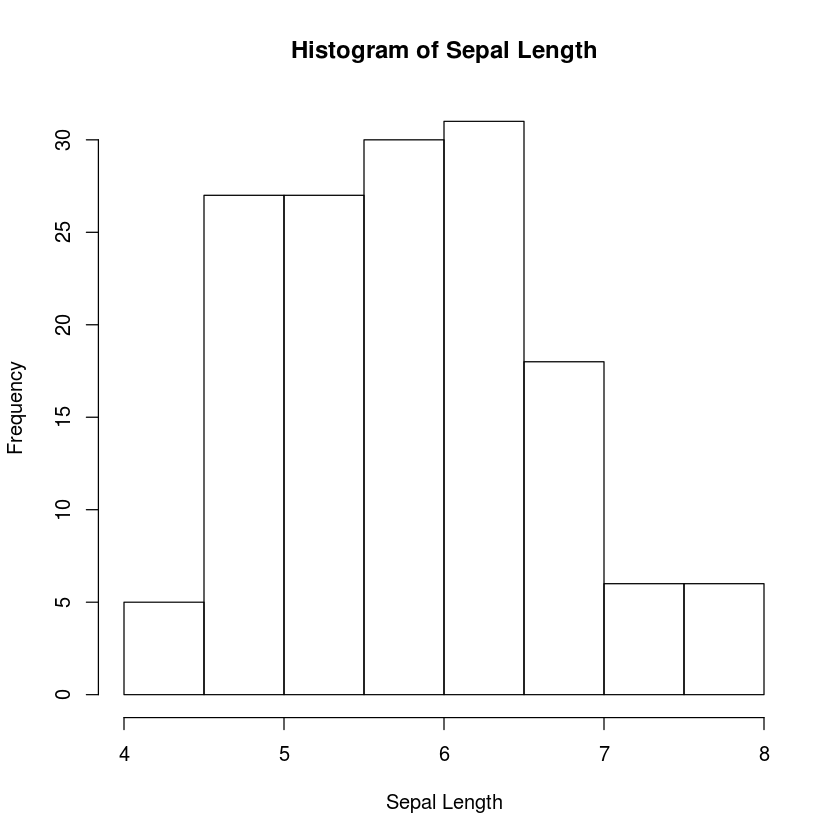

In [8]:
h1<-hist(iris$Sepal.Length, breaks=10, xlab="Sepal Length", main="Histogram of Sepal Length") 
# break 切成 10組
# 但你會發現怎麼只取8組
# 別忘了最左最右的兩刀


In [9]:
h1$breaks #看一下它怎麼切的

[1] 4.0 4.5 5.0 5.5 6.0 6.5 7.0 7.5 8.0

In [10]:
seq(4,8,by=0.4) # 自己決定切割的組距 （從4到8 每0.4 切一組距）


[1] 4.0 4.4 4.8 5.2 5.6 6.0 6.4 6.8 7.2 7.6 8.0

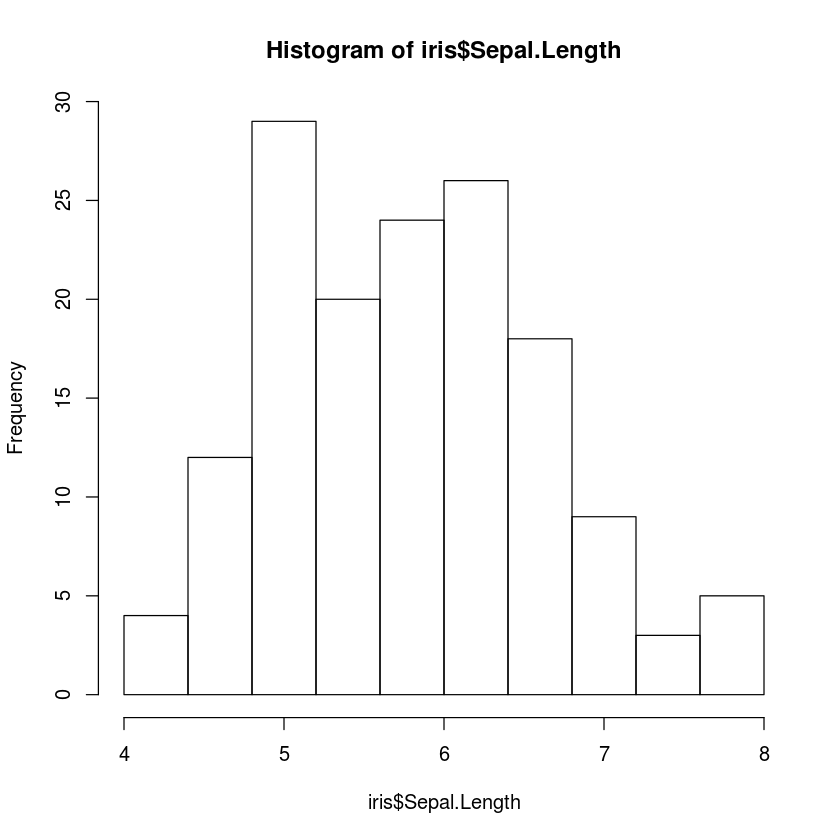

In [11]:
h2<-hist(iris$Sepal.Length, breaks=seq(4,8,by=0.4))

### 4-2. 直方圖-常態分配
在直方圖中, 我們很常搭配常態分配曲線, 來看資料符不符合常態

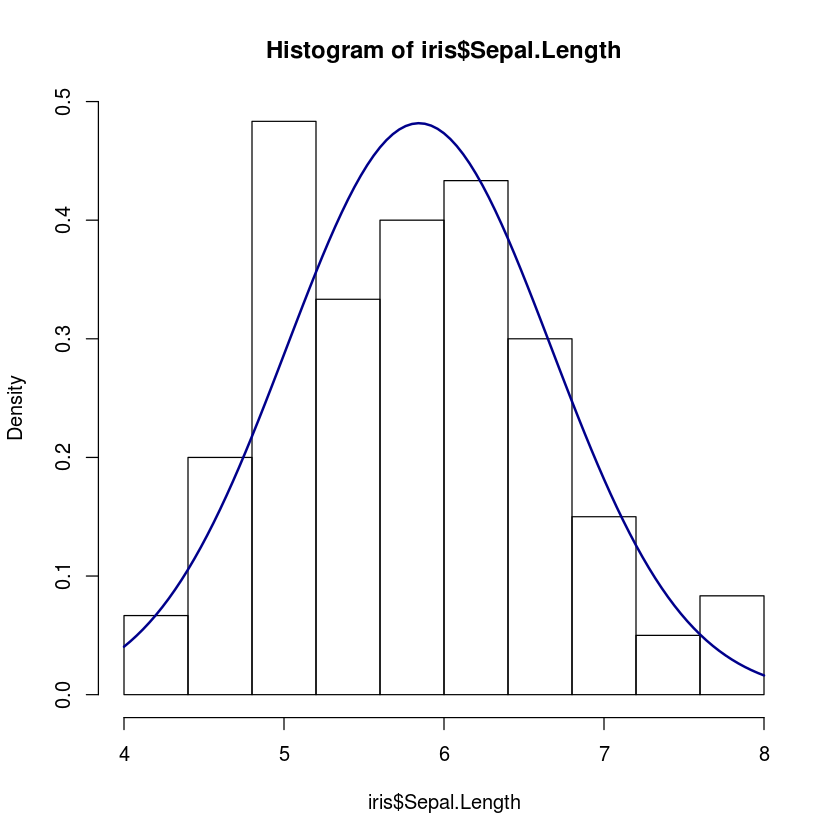

In [12]:
h3<-hist(iris$Sepal.Length, breaks=seq(4,8,by=0.4), prob=TRUE) 
m = mean(iris$Sepal.Length)
std = sqrt(var(iris$Sepal.Length))

curve(dnorm(x, mean=m, sd=std), col="darkblue", lwd=2, add=TRUE) #add=TRUE 是將曲線疊加上去

### 4-4. 長條圖Bar Chart

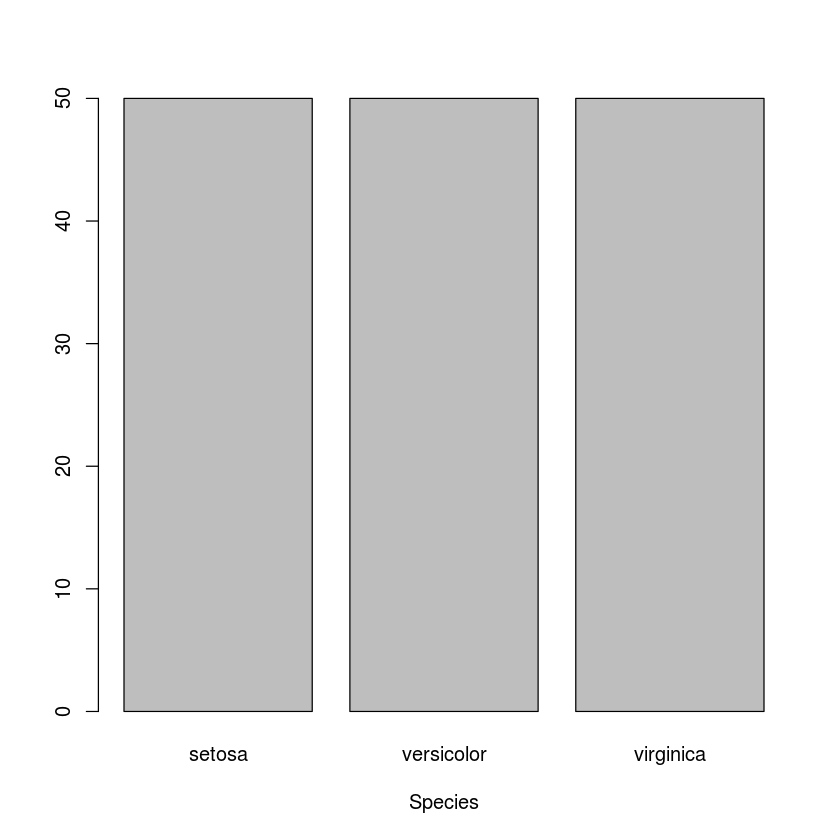

In [13]:
plot(iris$Species, xlab="Species")

### [補充說明] 直方圖 vs 長條圖

- 都用來表示次數分配
 1. 長條圖的每一根柱子之間是分開的，而直方圖則是相連
  2. 長條圖的X軸用來描述離散變數，直方圖則描述連續變數
   * nominal variable或ordinal variable適用長條圖
   * Interval variable或ratio variable則是用直方圖


### 4-5. 盒鬚圖Box Plot

null device 
          1

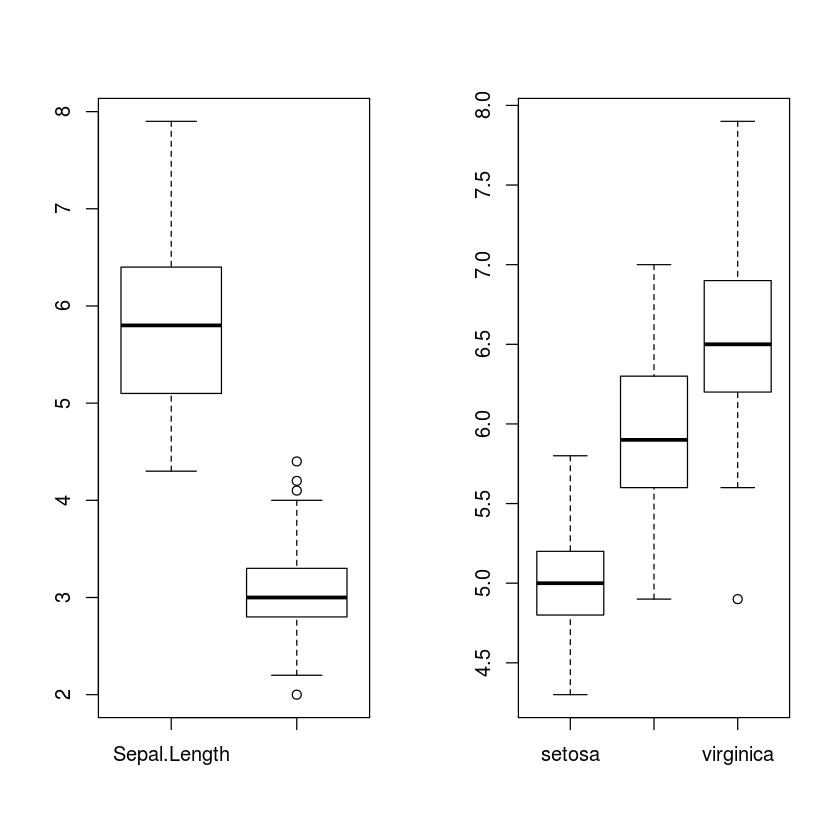

In [25]:
par(mfrow=c(1,2))
boxplot(iris[,1:2]) #單變數畫圖
boxplot(iris$Sepal.Length~iris$Species) #兩個變數

dev.off()

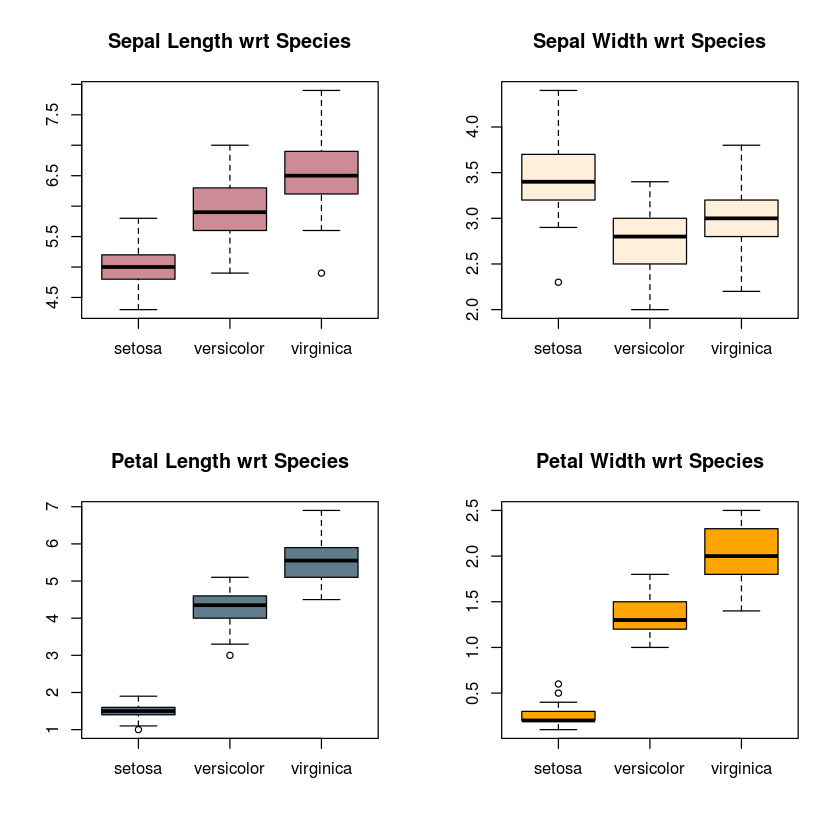

In [22]:
par(mfrow=c(2,2))
boxplot(Sepal.Length  ~ Species, iris, main = "Sepal Length wrt Species", col = "lightpink3")
boxplot(Sepal.Width   ~ Species, iris, main = "Sepal Width wrt Species", col = "antiquewhite1")
boxplot(Petal.Length  ~ Species, iris, main = "Petal Length wrt Species", col = "lightskyblue4")
boxplot(Petal.Width  ~ Species, iris, main = "Petal Width wrt Species", col = "orange1")

dev.off()

### 4-6. 散布圖 Scatter Plot

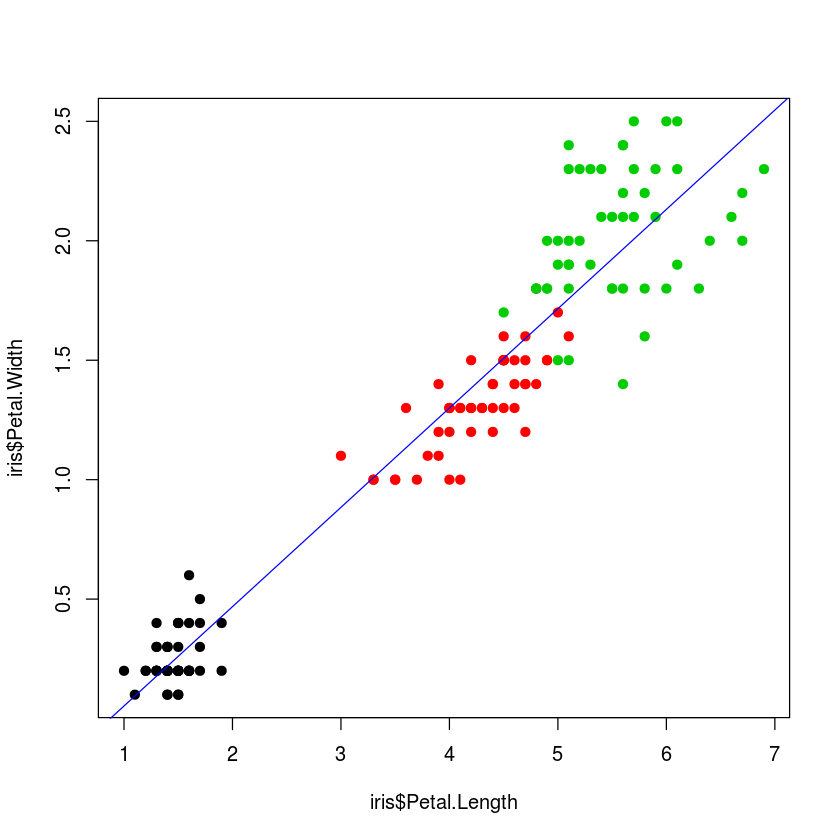

In [16]:
plot(iris$Petal.Length, iris$Petal.Width, pch=19, col=iris$Species)
abline(lm(iris$Petal.Width~iris$Petal.Length), col="blue") #abline是畫一條線（本例而言是畫迴歸線 lm)

### [散布矩陣圖] 用意

 - 觀察變數間的相關性
 * 變數的篩選：
 - 相關係數(Correlation Coefficient)

 #### [補充]：
   *  主成分分析(Principal Component Analysis)
   *  Step-wise forward selection
   *  Step-wise backward selection

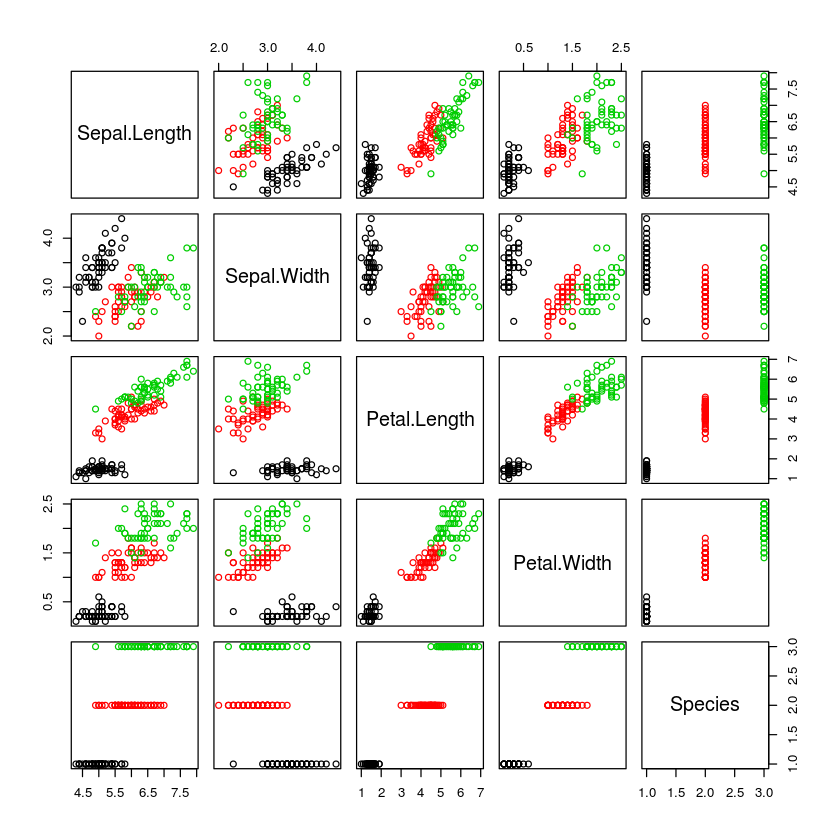

In [19]:
with(iris, plot(iris, col = Species)) #散布矩陣圖

#你會看到最右邊與最下面呈現是名目資料
# 另外 Petal.Length 及 Petal.Width 呈現線性關系 （在我還沒有用其它任何統計方法, 我就大概猜的到這兩個變數有關係）

### 4-7. 圓餅圖 Pie chat


    setosa versicolor  virginica 
        50         50         50 

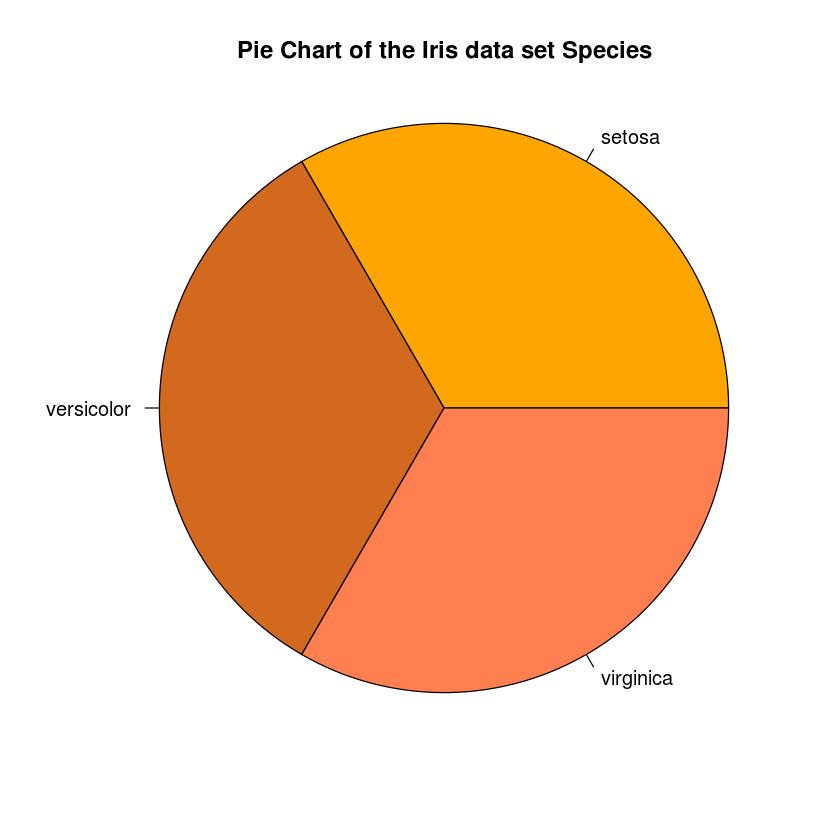

In [20]:
table(iris$Species)
pie(table(iris$Species), main = "Pie Chart of the Iris data set Species", 
    col = c("orange1", "chocolate", "coral"), radius = 1)